In [1]:
import pandas as pd
import json
import statistics

data_ebs = json.load(open('ebs.log', 'r'))
data_nvme = json.load(open('nvme.log', 'r'))
df_ebs = pd.DataFrame(data_ebs)
df_nvme = pd.DataFrame(data_nvme)
df = df_nvme.join(df_ebs.set_index('process_size'), on='process_size', lsuffix='_nvme', rsuffix='_ebs')

df['retrival_time_nvme_mean'] = pd.DataFrame(df['retrival_time_nvme'].values.tolist()).mean(1)
df['retrival_time_nvme_stdev'] = pd.DataFrame(df['retrival_time_nvme'].values.tolist()).std(1)
df['retrival_time_ebs_mean'] = pd.DataFrame(df['retrival_time_ebs'].values.tolist()).mean(1)
df['retrival_time_ebs_stdev'] = pd.DataFrame(df['retrival_time_ebs'].values.tolist()).std(1)

df['min_resident_memory_nvme_mean'] = pd.DataFrame(df['min_resident_memory_nvme'].values.tolist()).mean(1)
df['min_resident_memory_nvme_stdev'] = pd.DataFrame(df['min_resident_memory_nvme'].values.tolist()).std(1)
df['min_resident_memory_ebs_mean'] = pd.DataFrame(df['min_resident_memory_ebs'].values.tolist()).mean(1)
df['min_resident_memory_ebs_stdev'] = pd.DataFrame(df['min_resident_memory_ebs'].values.tolist()).std(1)

df['process_size_h'] = ['128KB', '256KB', '512KB', '1MB', '2MB', '4MB', '8MB', '16MB', '32MB', '64MB', '128MB', '256MB', '512MB', '1GB', '2GB']
df

,process_size,min_resident_memory_nvme,retrival_time_nvme,min_resident_memory_ebs,retrival_time_ebs,retrival_time_nvme_mean,retrival_time_nvme_stdev,retrival_time_ebs_mean,retrival_time_ebs_stdev,min_resident_memory_nvme_mean,min_resident_memory_nvme_stdev,min_resident_memory_ebs_mean,min_resident_memory_ebs_stdev,process_size_h
0,131072,"[8192, 53248, 69632, 86016, 98304, 102400, 102...","[0.00041985511779785156, 0.0005953311920166016...","[36864, 65536, 77824, 90112, 102400, 262144, 9...","[0.001294851303100586, 0.0017497539520263672, ...",0.000646,0.000091,0.001617,0.000387,82739.2,31241.977277,122470.4,77294.027050,128KB
1,262144,"[110592, 114688, 110592, 118784, 131072, 13107...","[0.0009310245513916016, 0.0008852481842041016,...","[176128, 155648, 180224, 151552, 167936, 20480...","[0.0025310516357421875, 0.002773284912109375, ...",0.000927,0.000121,0.002183,0.000391,130662.4,16091.251254,174899.2,18525.314409,256KB
2,524288,"[102400, 102400, 102400, 102400, 102400, 15974...","[0.0030019283294677734, 0.002511739730834961, ...","[147456, 126976, 200704, 167936, 167936, 24985...","[0.0032777786254882812, 0.0031633377075195312,...",0.001724,0.000572,0.003249,0.000357,119603.2,27699.783604,178995.2,36280.377644,512KB
3,1048576,"[143360, 131072, 126976, 118784, 110592, 13107...","[0.0017118453979492188, 0.001730203628540039, ...","[274432, 167936, 139264, 155648, 217088, 18841...","[0.0045392513275146484, 0.004272937774658203, ...",0.002353,0.000598,0.004928,0.000363,131481.6,18056.501071,190464.0,37602.479729,1MB
4,2097152,"[176128, 159744, 122880, 159744, 229376, 15564...","[0.0032806396484375, 0.004723072052001953, 0.0...","[286720, 245760, 237568, 253952, 200704, 20070...","[0.008799314498901367, 0.008051872253417969, 0...",0.003432,0.000595,0.008356,0.001007,178585.6,31384.852918,237158.4,27473.410900,2MB
5,4194304,"[241664, 258048, 225280, 258048, 262144, 26214...","[0.006592273712158203, 0.006211996078491211, 0...","[290816, 245760, 258048, 196608, 270336, 28262...","[0.011972427368164062, 0.010040760040283203, 0...",0.005912,0.000474,0.011047,0.001108,233881.6,26294.632774,258048.0,33721.245792,4MB
6,8388608,"[241664, 208896, 192512, 241664, 212992, 22528...","[0.0096588134765625, 0.0109710693359375, 0.011...","[274432, 245760, 290816, 208896, 253952, 29081...","[0.021439552307128906, 0.019131898880004883, 0...",0.010772,0.000669,0.019677,0.001090,221184.0,19596.219862,265011.2,31789.112031,8MB
7,16777216,"[208896, 393216, 319488, 397312, 475136, 41779...","[0.01956486701965332, 0.021193981170654297, 0....","[344064, 331776, 221184, 294912, 245760, 29900...","[0.037085533142089844, 0.03702259063720703, 0....",0.020215,0.001006,0.037577,0.003042,414105.6,97149.007478,284262.4,43442.495169,16MB
8,33554432,"[512000, 520192, 536576, 569344, 462848, 59801...","[0.039406538009643555, 0.03827071189880371, 0....","[303104, 249856, 303104, 249856, 331776, 36864...","[0.07696247100830078, 0.07399892807006836, 0.0...",0.039918,0.001059,0.076860,0.002673,564838.4,59808.769129,315801.6,40706.629684,32MB
9,67108864,"[667648, 753664, 638976, 663552, 737280, 72908...","[0.07865691184997559, 0.07767438888549805, 0.0...","[425984, 425984, 479232, 516096, 409600, 46284...","[0.29485416412353516, 0.3029921054840088, 0.29...",0.077493,0.000948,0.318976,0.034187,722534.4,47461.783239,445235.2,39761.451027,64MB


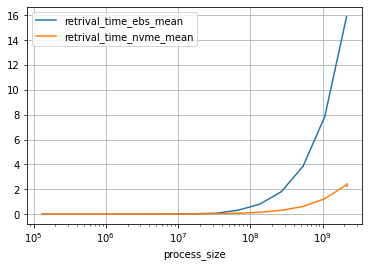

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_facecolor('xkcd:white')

# df.plot.line(x='process_size', y=['retrival_time_ebs_mean', 'retrival_time_nvme_mean'], yerr=['retrival_time_ebs_stdev', 'retrival_time_nvme_stdev'], ax=ax, capsize=4, rot=0)
df.plot.line(x='process_size', y=['retrival_time_ebs_mean', 'retrival_time_nvme_mean'], yerr=[df['retrival_time_ebs_stdev'], df['retrival_time_nvme_stdev']], ax=ax, rot=0)
plt.xticks(df['process_size'], df['process_size_h'])
plt.grid()
plt.xscale('log')

# for x, ya, yb, xl in zip(df['process_size'], df['retrival_time_ebs_mean'], df['retrival_time_nvme_mean'], df['process_size_h']):
#     label = "({}, {:.4f}s)".format(xl, ya)
#     plt.annotate(label, # this is the text
#                  (x,ya), # this is the point to label
#                  textcoords="offset points", # how to position the text
#                  xytext=(0,10), # distance from text to points (x,y)
#                  ha='center',
#                  rotation=90) # horizontal alignment can be left, right or center
#     label = "({}, {:.4f}s)".format(xl, yb)
#     plt.annotate(label, # this is the text
#                  (x,yb), # this is the point to label
#                  textcoords="offset points", # how to position the text
#                  xytext=(0,10), # distance from text to points (x,y)
#                  ha='center',
#                  rotation=90) # horizontal alignment can be left, right or center



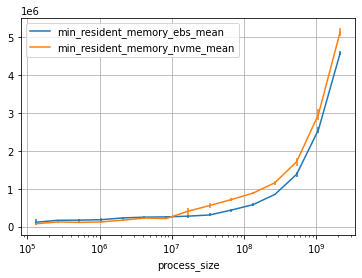

In [3]:

fig, ax = plt.subplots()
ax.set_facecolor('xkcd:white')

# df.plot.line(x='process_size', y=['retrival_time_ebs_mean', 'retrival_time_nvme_mean'], yerr=['retrival_time_ebs_stdev', 'retrival_time_nvme_stdev'], ax=ax, capsize=4, rot=0)
df.plot.line(x='process_size', y=['min_resident_memory_ebs_mean', 'min_resident_memory_nvme_mean'], yerr=[df['min_resident_memory_ebs_stdev'], df['min_resident_memory_nvme_stdev']], ax=ax, rot=0)
plt.xticks(df['process_size'], df['process_size_h'])
plt.grid()
plt.xscale('log')

# for x, ya, yb, xl in zip(df['process_size'], df['retrival_time_ebs_mean'], df['retrival_time_nvme_mean'], df['process_size_h']):
#     label = "({}, {:.4f}s)".format(xl, ya)
#     plt.annotate(label, # this is the text
#                  (x,ya), # this is the point to label
#                  textcoords="offset points", # how to position the text
#                  xytext=(0,10), # distance from text to points (x,y)
#                  ha='center',
#                  rotation=90) # horizontal alignment can be left, right or center
#     label = "({}, {:.4f}s)".format(xl, yb)
#     plt.annotate(label, # this is the text
#                  (x,yb), # this is the point to label
#                  textcoords="offset points", # how to position the text
#                  xytext=(0,10), # distance from text to points (x,y)
#                  ha='center',
#                  rotation=90) # horizontal alignment can be left, right or center

In [4]:
df

,process_size,min_resident_memory_nvme,retrival_time_nvme,min_resident_memory_ebs,retrival_time_ebs,retrival_time_nvme_mean,retrival_time_nvme_stdev,retrival_time_ebs_mean,retrival_time_ebs_stdev,min_resident_memory_nvme_mean,min_resident_memory_nvme_stdev,min_resident_memory_ebs_mean,min_resident_memory_ebs_stdev,process_size_h
0,131072,"[8192, 53248, 69632, 86016, 98304, 102400, 102...","[0.00041985511779785156, 0.0005953311920166016...","[36864, 65536, 77824, 90112, 102400, 262144, 9...","[0.001294851303100586, 0.0017497539520263672, ...",0.000646,0.000091,0.001617,0.000387,82739.2,31241.977277,122470.4,77294.027050,128KB
1,262144,"[110592, 114688, 110592, 118784, 131072, 13107...","[0.0009310245513916016, 0.0008852481842041016,...","[176128, 155648, 180224, 151552, 167936, 20480...","[0.0025310516357421875, 0.002773284912109375, ...",0.000927,0.000121,0.002183,0.000391,130662.4,16091.251254,174899.2,18525.314409,256KB
2,524288,"[102400, 102400, 102400, 102400, 102400, 15974...","[0.0030019283294677734, 0.002511739730834961, ...","[147456, 126976, 200704, 167936, 167936, 24985...","[0.0032777786254882812, 0.0031633377075195312,...",0.001724,0.000572,0.003249,0.000357,119603.2,27699.783604,178995.2,36280.377644,512KB
3,1048576,"[143360, 131072, 126976, 118784, 110592, 13107...","[0.0017118453979492188, 0.001730203628540039, ...","[274432, 167936, 139264, 155648, 217088, 18841...","[0.0045392513275146484, 0.004272937774658203, ...",0.002353,0.000598,0.004928,0.000363,131481.6,18056.501071,190464.0,37602.479729,1MB
4,2097152,"[176128, 159744, 122880, 159744, 229376, 15564...","[0.0032806396484375, 0.004723072052001953, 0.0...","[286720, 245760, 237568, 253952, 200704, 20070...","[0.008799314498901367, 0.008051872253417969, 0...",0.003432,0.000595,0.008356,0.001007,178585.6,31384.852918,237158.4,27473.410900,2MB
5,4194304,"[241664, 258048, 225280, 258048, 262144, 26214...","[0.006592273712158203, 0.006211996078491211, 0...","[290816, 245760, 258048, 196608, 270336, 28262...","[0.011972427368164062, 0.010040760040283203, 0...",0.005912,0.000474,0.011047,0.001108,233881.6,26294.632774,258048.0,33721.245792,4MB
6,8388608,"[241664, 208896, 192512, 241664, 212992, 22528...","[0.0096588134765625, 0.0109710693359375, 0.011...","[274432, 245760, 290816, 208896, 253952, 29081...","[0.021439552307128906, 0.019131898880004883, 0...",0.010772,0.000669,0.019677,0.001090,221184.0,19596.219862,265011.2,31789.112031,8MB
7,16777216,"[208896, 393216, 319488, 397312, 475136, 41779...","[0.01956486701965332, 0.021193981170654297, 0....","[344064, 331776, 221184, 294912, 245760, 29900...","[0.037085533142089844, 0.03702259063720703, 0....",0.020215,0.001006,0.037577,0.003042,414105.6,97149.007478,284262.4,43442.495169,16MB
8,33554432,"[512000, 520192, 536576, 569344, 462848, 59801...","[0.039406538009643555, 0.03827071189880371, 0....","[303104, 249856, 303104, 249856, 331776, 36864...","[0.07696247100830078, 0.07399892807006836, 0.0...",0.039918,0.001059,0.076860,0.002673,564838.4,59808.769129,315801.6,40706.629684,32MB
9,67108864,"[667648, 753664, 638976, 663552, 737280, 72908...","[0.07865691184997559, 0.07767438888549805, 0.0...","[425984, 425984, 479232, 516096, 409600, 46284...","[0.29485416412353516, 0.3029921054840088, 0.29...",0.077493,0.000948,0.318976,0.034187,722534.4,47461.783239,445235.2,39761.451027,64MB
